In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.animation import FuncAnimation
from tqdm import tqdm



In [10]:
N=20
K=1


a=destroy(N)
ad=create(N)

psi0=basis(N,0)

H=K*ad*a+K*ad*ad*a*a/2.0
Ht=(a*a+ad*ad)/2.0


#print(Ht)


f=lambda t:-t*K*K/100

tlist=np.linspace(0.0,800/K,5000)

res=sesolve([H,[Ht,f]],psi0,tlist,options={"store_final_state":True,"store_states":True,"nsteps":1000000,"progress_bar":"tqdm"})




  0%|          | 0/4999 [00:00<?, ?it/s]

In [11]:
x=np.linspace(-6,6,500)



colors = ['#1102b6', 'white', '#bd0000']
mi_cmap = LinearSegmentedColormap.from_list("cmap_centrada_en_cero", colors)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

mi_cmap = LinearSegmentedColormap.from_list("mi_colormap", colors)


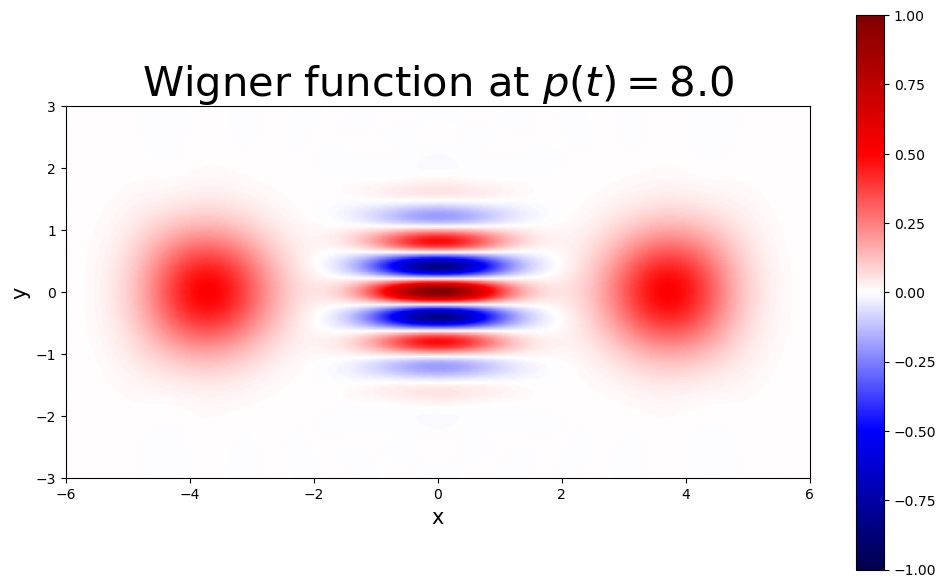

In [31]:
plt.subplots(figsize=(12,12))





plt.title(r"Wigner function at $p(t)=$"+str(np.round(-f(tlist[-1]),decimals=2)),fontsize=30)

Wigner1=wigner(ket2dm(res.states[-1]),x,x)

  
plt.imshow(Wigner1/Wigner1.max(),cmap="seismic",extent=[-6, 6, -6, 6],norm=norm)




plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)

plt.ylim(-3,3)
plt.colorbar(shrink=0.6)

plt.savefig("wigner_final.png",format="png",bbox_inches="tight")


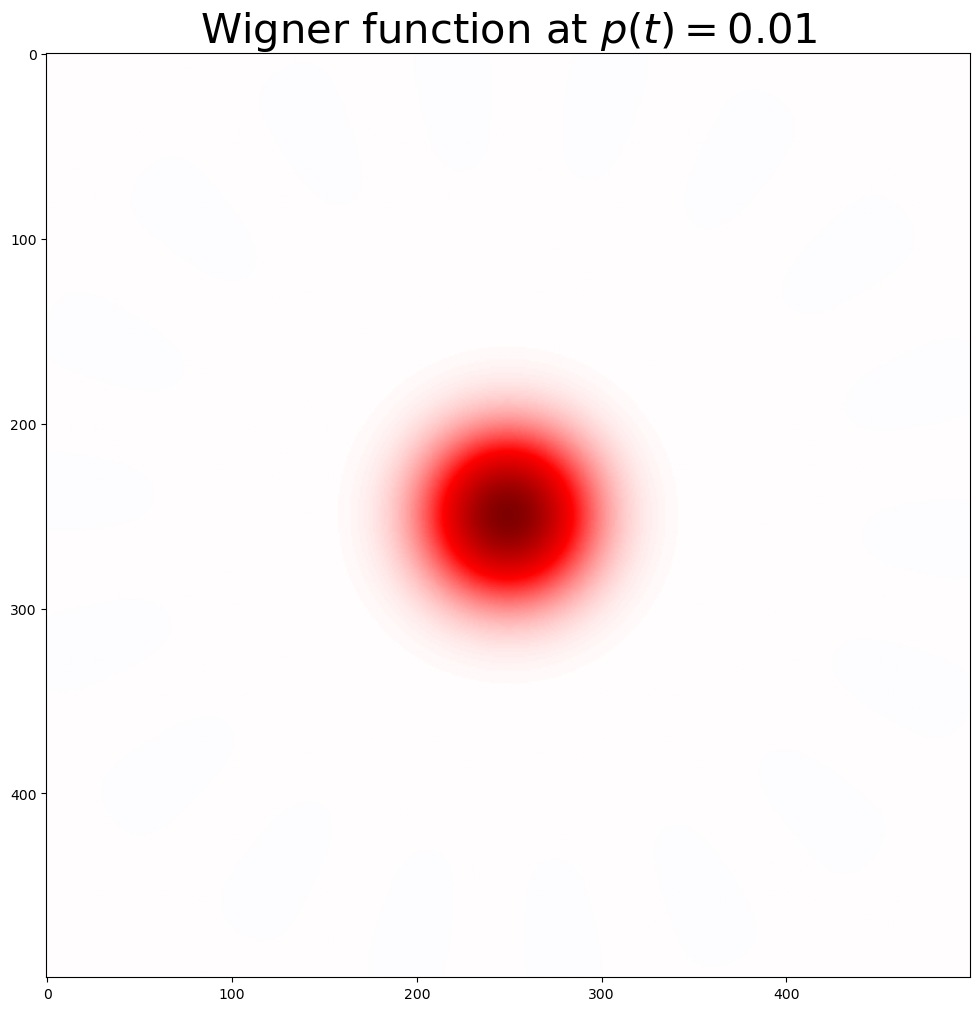

In [10]:

fig,ax=plt.subplots(figsize=(12,12))



def p_growth(n):
    
    ax.clear() # Clears the previous drawing

    ax.set_title(r"Wigner function at $p(t)=$"+str(np.round(-f(tlist[n]),decimals=2)),fontsize=30)

    Wigner1=wigner(ket2dm(res.states[n]),x,x)

  
    ax.imshow(Wigner1/Wigner1.max(),cmap="seismic",norm=norm)




plist=[i for i in range(1,tlist.size,5)]

    # Creates and saves the animations
anim=FuncAnimation(fig, p_growth, frames=plist,      # Number of frames
    interval=10,repeat=False)
anim.save(f"wigner_animacion.gif", writer='pillow', fps = 10)

